# fetch data

In [37]:
import requests
import csv
from datetime import datetime, timedelta

api_url = "https://neptune.kyogojo.com/api/statistics/get-multiple?stations=BSLG-003&days=1734307200000,1734393600000,1734480000000,1734566400000,1734652800000,1734739200000,1734825600000,1734912000000,1734998400000,1735084800000,1735171200000,1735257600000,1735344000000,1735430400000,1735516800000,1735603200000"

response = requests.get(api_url)
data = response.json()

pressure_data = data["payload"]["data"][0]["pressure"]

csv_filename = r"C:\Users\Sarah\Desktop\trend_analysis\data\water_pressureBSLG002.csv"

# save to CSV
with open(csv_filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["value", "time"])

    for entry in pressure_data:
        value = entry["value"]
        timestamp = entry["time"]
        
        # convert UTC time to Philippine Standard Time (UTC+8)
        utc_time = datetime.utcfromtimestamp(timestamp / 1000)  #milliseconds to seconds
        pst_time = utc_time + timedelta(hours=8)  

        formatted_time = pst_time.strftime("%Y-%m-%d %H:%M:%S")    
        writer.writerow([value, formatted_time])

print(f"Data saved to {csv_filename}")


C:\Users\Sarah\AppData\Local\Temp\ipykernel_19420\3836719020.py:24: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  utc_time = datetime.utcfromtimestamp(timestamp / 1000)  #milliseconds to seconds


Data saved to C:\Users\Sarah\Desktop\trend_analysis\data\water_pressureBSLG002.csv


#  data

In [79]:
#importing required functiond from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [80]:
file_path = r"C:\Users\Sarah\Desktop\trend_analysis\data\BSLG-002-JAN-MARCH.csv"
df = pd.read_csv(file_path)
df.head()

,value,time
0,26.09,2024-12-01 00:00:02
1,25.99,2024-12-01 00:01:03
2,26.06,2024-12-01 00:02:03
3,25.93,2024-12-01 00:03:03
4,26.04,2024-12-01 00:04:03


In [81]:

print(df.shape)


(200572, 2)


In [82]:
file_path = r"C:\Users\Sarah\Desktop\trend_analysis\data\BSLG-002-JAN-MARCH.csv"
df = pd.read_csv(file_path)
df.head()
# Define the ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '11-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

df['Value Range'] = pd.cut(df['value'], bins=bins, labels=labels, right=False)
range_counts = df['Value Range'].value_counts()

print(range_counts)


Value Range
30-39    60999
50-59    48559
20-29    44849
40-49    40846
11-19     4385
60-69      814
0-10       120
70-79        0
80-89        0
Name: count, dtype: int64


In [98]:
# Load the file
file_path = r"C:\Users\Sarah\Desktop\trend_analysis\data\BSLG-002-JAN-MARCH.csv"
df = pd.read_csv(file_path)

# Define conditions
condition1 = (df['value'] >= 30) & (df['value'] <= 39)
condition2 = (df['value'] >= 20) & (df['value'] <= 29)

# Drop the specified number of rows
rows_to_drop_condition1 = df[condition1].index[:25000]
rows_to_drop_condition2 = df[condition2].index[:7000]
rows_to_drop = rows_to_drop_condition1.union(rows_to_drop_condition2)
df = df.drop(rows_to_drop)

# Define the ranges and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Categorize the values into ranges
df['Value Range'] = pd.cut(df['value'], bins=bins, labels=labels, right=False)
range_counts = df['Value Range'].value_counts()

print("Rows dropped successfully!")
print(range_counts)


Rows dropped successfully!
Value Range
50-59    48559
40-49    40846
20-29    37849
30-39    35999
10-19     4385
60-69      814
0-9        120
70-79        0
80-89        0
90-99        0
Name: count, dtype: int64


In [99]:
# column to datetime
df['time'] = pd.to_datetime(df['time'])

# extract time features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second
df['millisecond'] = df['time'].dt.microsecond // 1000  # microseconds to milliseconds

# drop time column
df.drop(columns=['time'], inplace=True)
# drop time column
df.drop(columns=['Value Range'], inplace=True)

# Features (X), target variable (y)
X = df.drop(columns=['value'])
y = df['value']

df.head()

,value,year,month,day,hour,minute,second,millisecond
225,19.98,2024,12,1,3,40,53,0
226,19.98,2024,12,1,3,41,48,0
228,19.80,2024,12,1,3,43,52,0
229,19.88,2024,12,1,3,44,21,0
230,19.73,2024,12,1,3,45,27,0


In [100]:

print(df.shape)


(168572, 8)


In [101]:
# Ensure data is sorted before training
df = df.sort_values(by=['year', 'month', 'day', 'hour', 'minute', 'second', 'millisecond']).reset_index(drop=True)
df.head()


,value,year,month,day,hour,minute,second,millisecond
0,19.98,2024,12,1,3,40,53,0
1,19.98,2024,12,1,3,41,48,0
2,19.80,2024,12,1,3,43,52,0
3,19.88,2024,12,1,3,44,21,0
4,19.73,2024,12,1,3,45,27,0


In [102]:
# missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
value          0
year           0
month          0
day            0
hour           0
minute         0
second         0
millisecond    0
dtype: int64


In [103]:
# 85% train, 15% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [104]:
# standardize features (x)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
import joblib

# Save the scaler
joblib.dump(scaler, r"C:\Users\Sarah\Desktop\trend_analysis\model\scaler_002.pkl")
print("Scaler saved successfully!")


Scaler saved successfully!


In [106]:
# Wrap the scaled arrays with the original feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [107]:
# Initializing base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

# Creating the stacked model
stacked_model = StackingRegressor(estimators=[('rf', rf_model), ('lr', lr_model)])

# train
stacked_model.fit(X_train_scaled, y_train)


StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('lr', LinearRegression())])

Accuracy: 0.99604019395449


In [108]:
accuracy = stacked_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9954031891089208


In [16]:
# train
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,
                              random_state=42)
model.fit(X_train_scaled, y_train)
print(model)


RandomForestRegressor(random_state=42)


In [17]:
from sklearn.model_selection import cross_val_score
# R-squared score
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")
print(f"Cross-validation score: {cv_scores.mean():.4f}")


Train R-squared: 0.9994
Test R-squared: 0.9960
Cross-validation score: 0.9944


In [62]:
# Predict on test set
y_pred = stacked_model.predict(X_test_scaled)

# Show some predictions
df_predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(df_predictions.tail(10))


       Actual  Predicted
31437   51.23  51.322954
31438   28.90  28.889799
31439   45.25  44.774272
31440   40.65  38.246885
31441   28.29  28.398476
31442   22.47  22.938096
31443   54.71  54.519770
31444   55.59  55.616124
31445   55.38  55.682669
31446   28.91  28.837769


In [97]:
import joblib

# Save the trained model
joblib.dump(stacked_model, r"C:\Users\Sarah\Desktop\trend_analysis\model\random_forest_bslg002.pkl")

print("Model saved successfully!")


Model saved successfully!


In [20]:
# Load the model
loaded_model = joblib.load(r"C:\Users\Sarah\Desktop\trend_analysis\model\random_forest_bslg_002.pkl")

print("Model loaded successfully!")

# Now you can make predictions using the loaded model
y_pred = loaded_model.predict(X_test)


Model loaded successfully!


C:\Users\Sarah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


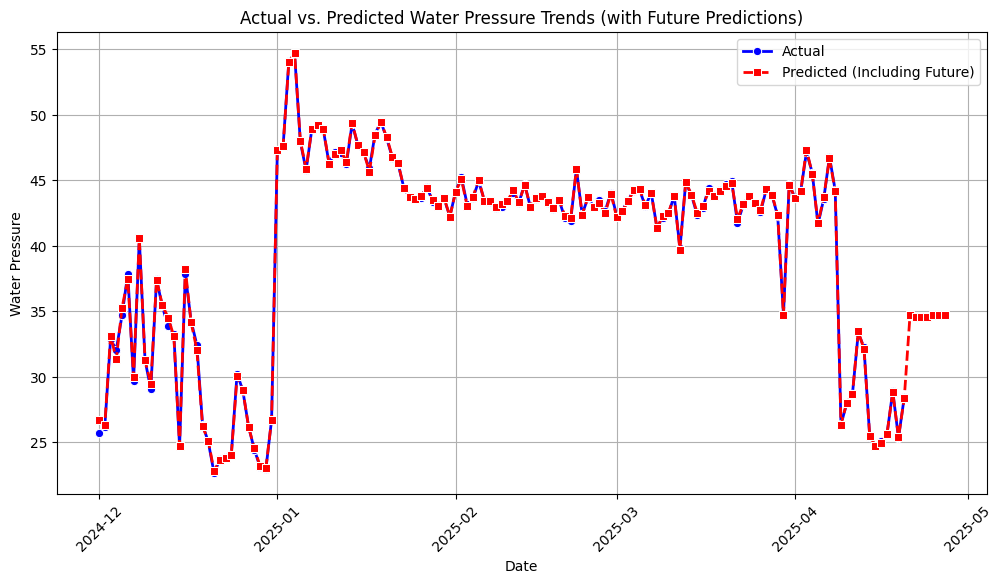

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Convert X_test back to DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=['year', 'month', 'day', 'hour', 'minute', 'second', 'millisecond'])
X_test_df['Actual'] = y_test.values
X_test_df['Predicted'] = y_pred

# Group by day (calculate average actual and predicted value per day)
daily_avg = X_test_df.groupby(['year', 'month', 'day'])[['Actual', 'Predicted']].mean().reset_index()

# Create date column for plotting
daily_avg['date'] = pd.to_datetime(daily_avg[['year', 'month', 'day']])

### 📌 Generate Future Dates for Prediction
future_days = 7  # Predict next 7 days
last_date = daily_avg['date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]

# Create future DataFrame
future_df = pd.DataFrame({
    'year': [d.year for d in future_dates],
    'month': [d.month for d in future_dates],
    'day': [d.day for d in future_dates],
    'hour': [0] * future_days,  # Assuming midnight for simplicity
    'minute': [0] * future_days,
    'second': [0] * future_days,
    'millisecond': [0] * future_days
})

# Standardize future data
future_scaled = scaler.transform(future_df)

# Predict future water pressure
future_df['Predicted'] = model.predict(future_scaled)
future_df['date'] = future_dates  # Assign future date column

# Append future predictions to daily_avg
extended_df = pd.concat([daily_avg, future_df], ignore_index=True)

### 📌 Plot Actual vs. Predicted (with Future Predictions)
plt.figure(figsize=(12, 6))
sns.lineplot(data=extended_df, x='date', y='Actual', label='Actual', marker='o', linewidth=2, color='blue')
sns.lineplot(data=extended_df, x='date', y='Predicted', label='Predicted (Including Future)', marker='s', linewidth=2, linestyle='dashed', color='red')

# Format the plot
plt.xlabel("Date")
plt.ylabel("Water Pressure")
plt.title("Actual vs. Predicted Water Pressure Trends (with Future Predictions)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()


____________

In [117]:
from xgboost import XGBRegressor

# Initialize XGBRegressor
xg_model = XGBRegressor(n_estimators=100,  
                     random_state=101, 
                     learning_rate=0.1, 
                     max_depth=10)     

# Train the model
xg_model.fit(X_train_scaled, y_train)

# Check the model
print(xg_model)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)


In [118]:
accuracy = xg_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.981047795170196


In [119]:
# Predict on test set
y_pred = xg_model.predict(X_test_scaled)

# Show some predictions
df_predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(df_predictions.tail(10))


       Actual  Predicted
50562   31.51  30.509462
50563   52.28  52.283504
50564   43.94  41.492577
50565   30.26  30.512724
50566   30.75  31.221897
50567   56.13  54.775566
50568   31.64  31.770210
50569   30.46  30.585569
50570   31.90  31.501047
50571   49.26  48.026981


In [121]:
import joblib

# Save the trained model
joblib.dump(xg_model, r"C:\Users\Sarah\Desktop\trend_analysis\model\xg_bslg002.pkl")

print("Model saved successfully!")


Model saved successfully!
